In [6]:
# !pip install opencv-python

In [1]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('difficulty_hard_p1_copy.png',0)

In [3]:
ret,thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)

In [4]:
k1 = np.ones((20,20))

In [5]:
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, k1)
cv2.imshow('opening', opening)

In [10]:
blur = cv2.GaussianBlur(image, (5,5), 0)
thresh = cv2.threshold(blur, 130, 255, cv2.THRESH_BINARY_INV)[1]

AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [7]:
image = cv2.imread('difficulty_hard_p1_copy.png',cv2.IMREAD_UNCHANGED)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)

binary = cv2.bitwise_not(binary)

H = cv2.Sobel(binary, cv2.CV_8U, 0, 2)
V = cv2.Sobel(binary, cv2.CV_8U, 2, 0)

rows,cols = image.shape[:2]

In [10]:
_,contours,_ = cv2.findContours(H, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
image = cv2.imread('difficulty_hard_p1_copy.png',cv2.IMREAD_UNCHANGED)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)

binary = cv2.bitwise_not(binary)

H = cv2.Sobel(binary, cv2.CV_8U, 0, 2)
V = cv2.Sobel(binary, cv2.CV_8U, 2, 0)

rows,cols = image.shape[:2]

_,contours,_ = cv2.findContours(V, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)
    # rows/3 is the threshold for length of line
    if h > rows/3:
        cv2.drawContours(V, [cnt], -1, 255, -1)
        cv2.drawContours(binary, [cnt], -1, 255, -1)
    else:
        cv2.drawContours(V, [cnt], -1, 0, -1)

_,contours,_ = cv2.findContours(H, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)
    # cols/3 is the threshold for length of line
    if w > cols/3:
        cv2.drawContours(H, [cnt], -1, 255, -1)
        cv2.drawContours(binary, [cnt], -1, 255, -1)
    else:
        cv2.drawContours(H, [cnt], -1, 0, -1)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
H = cv2.morphologyEx(H, cv2.MORPH_DILATE, kernel,iterations = 3)
V = cv2.morphologyEx(V, cv2.MORPH_DILATE, kernel, iterations = 3)

cross = cv2.bitwise_and(H, V)

_,contours,_ = cv2.findContours(cross,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for cnt in contours:
    mom = cv2.moments(cnt)
    (x,y) = mom['m10']/mom['m00'], mom['m01']/mom['m00']
    cv2.circle(image,(int(x),int(y)),4,(0,255,0),-1)
    centroids.append((x,y))

centroids.sort(key = lambda x: x[0], reverse = False)
centroids.sort(key = lambda x: x[1], reverse = False)

dx = int(centroids[1][0] - centroids[0][0])
centroids = np.array(centroids, dtype = np.float32)
(x,y,w,h) = cv2.boundingRect(centroids)

if x-dx > -5: x = max(x-dx,0)
if h+dx <= rows+5: h = min(h+dx,rows)
if w+dx <= cols+5: w = min(w+dx,cols)
cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0))

roi = binary[y:y+h,x:x+w]

roi = cv2.morphologyEx(roi, cv2.MORPH_OPEN, kernel,iterations = 1)

cv2.imshow('image', image)
cv2.imshow('roi', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 3, got 2)

https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html

In [ ]:
import numpy as np
import sys
import cv2 as cv
def show_wait_destroy(winname, img):
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)
def main(argv):
    # [load_image]
    # Check number of arguments
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1
    # Load the image
#     src = cv.imread(argv[0], cv.IMREAD_COLOR)
    src = cv.imread("difficulty_hard_p1_copy.png")
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    src = cv.imread("difficulty_hard_p1_copy.png")
#     cv.imshow("src", src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
#     show_wait_destroy("gray", gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
#     show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 300
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
#     show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 300
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv.erode(horizontal, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
#     show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
    show_wait_destroy("vertical_bit", vertical)
    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''
    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    show_wait_destroy("smooth - final", vertical)
    # [smooth]
    return 0
if __name__ == "__main__":
    main(sys.argv[1:])

In [5]:
import numpy as np
import sys
import cv2 as cv
from matplotlib import pyplot as plt

In [7]:
%matplotlib inline

In [2]:
def show_wait_destroy(winname, img):
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)

In [3]:
src = cv.imread("difficulty_hard_p1_copy.png")
# cv.imshow("src", src)

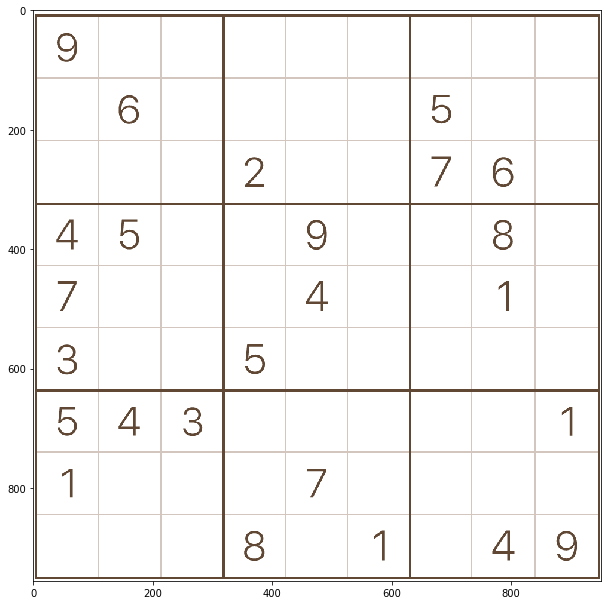

In [20]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(src)
plt.show()

In [21]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

In [51]:
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)

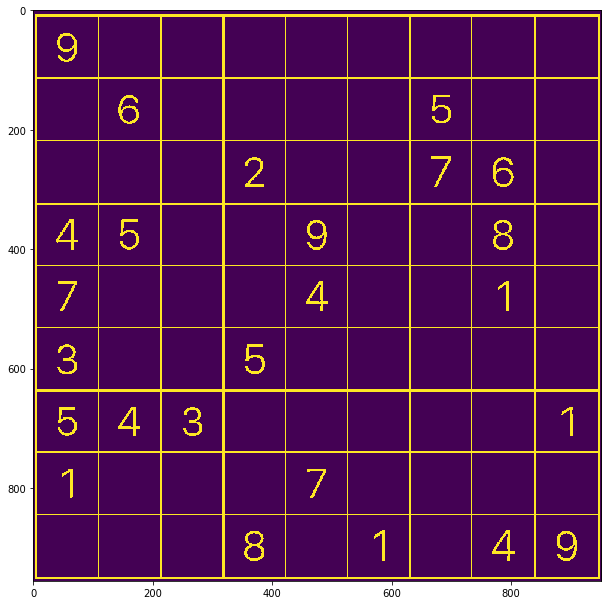

In [52]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(bw)
plt.show()

In [53]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

In [54]:
cols = horizontal.shape[1]
horizontal_size = cols // 300
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

In [55]:
rows = vertical.shape[0]
verticalsize = rows // 300
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
vertical = cv.erode(horizontal, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

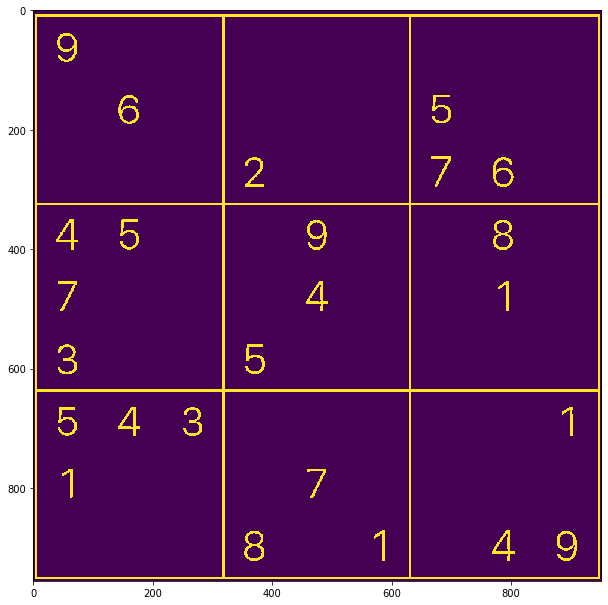

In [56]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(vertical)
plt.show()

In [57]:
#     Extract edges and smooth image according to the logic
#     1. extract edges
#     2. dilate(edges)
#     3. src.copyTo(smooth)
#     4. blur smooth img
#     5. smooth.copyTo(src, edges)

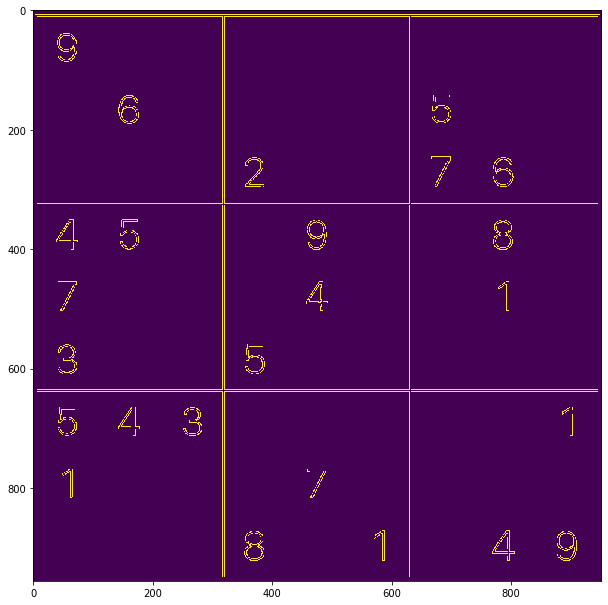

In [58]:
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, -2)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(edges)
plt.show()

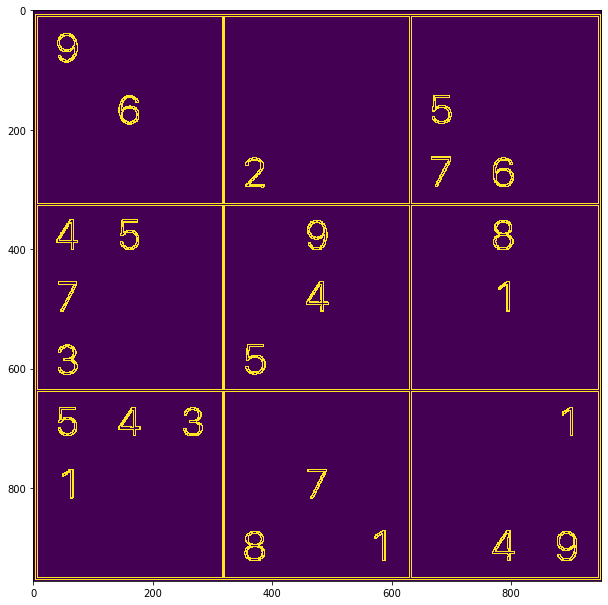

In [59]:
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(edges)
plt.show()

In [60]:
smooth = np.copy(vertical)
smooth = cv.blur(smooth, (2, 2))
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]

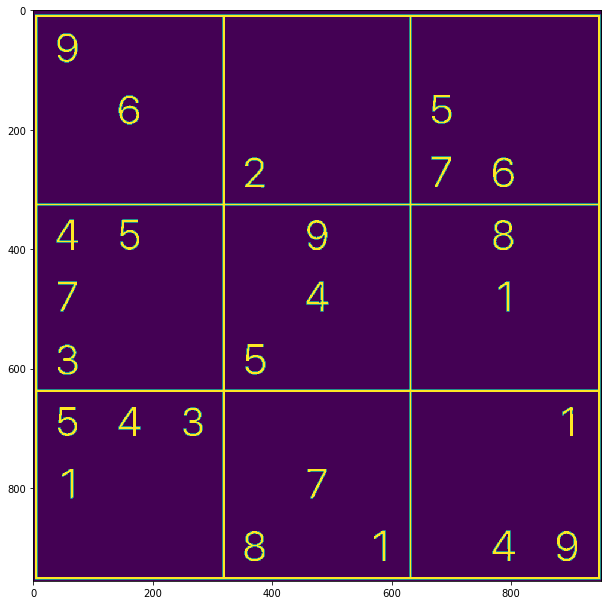

In [61]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(vertical)
plt.show()

In [53]:
gray = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
# thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
thresh = cv.threshold(gray, 120, 255, cv.THRESH_BINARY_INV)[1]

NameError: name 'cv' is not defined

In [54]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(thresh)
plt.show()

NameError: name 'thresh' is not defined

<Figure size 1332x756 with 0 Axes>

In [288]:
result = src.copy()

In [292]:
# Remove horizontal lines
horizontal_kernel = cv.getStructuringElement(cv.MORPH_RECT, (400,1))
remove_horizontal = cv.morphologyEx(thresh, cv.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv.findContours(remove_horizontal, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv.drawContours(result, [c], -1, (255,255,255), 5)

In [321]:
# for i in range(len(horizontal_kernel[0])):
#     horizontal_kernel[0][i] = 0

In [322]:
# horizontal_kernel

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

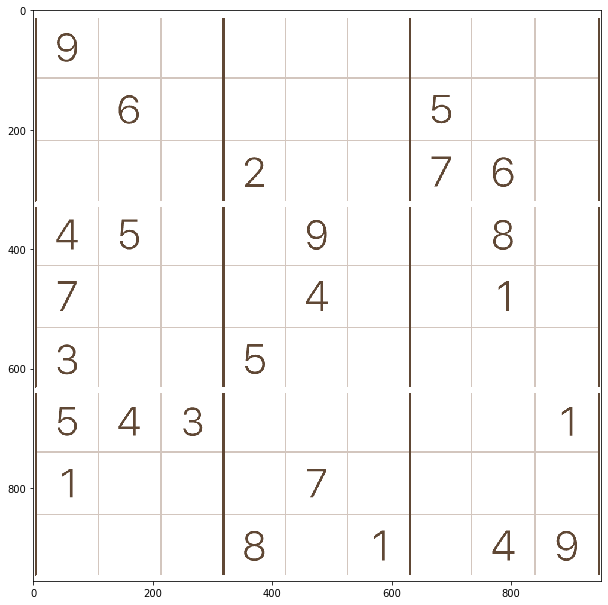

In [290]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(result)
plt.show()

In [197]:
# Remove vertical lines
vertical_kernel = cv.getStructuringElement(cv.MORPH_RECT, (1,40))
remove_vertical = cv.morphologyEx(thresh, cv.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv.findContours(remove_vertical, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv.drawContours(result, [c], -1, (255,255,255), 5)

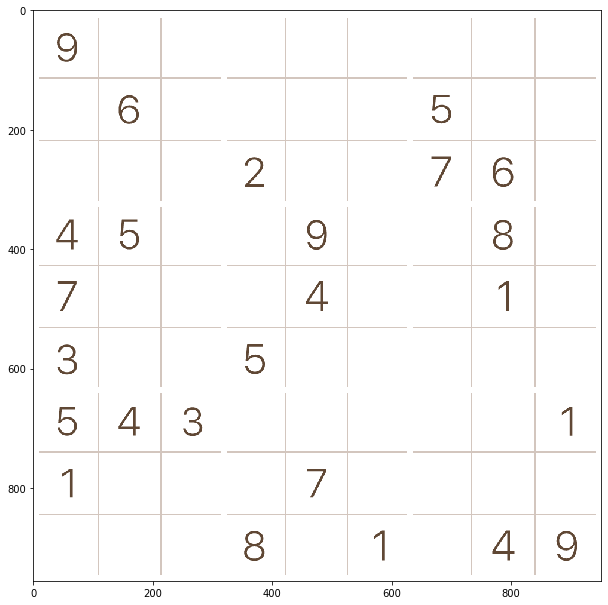

In [198]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(result)
plt.show()

## my experiments

In [467]:
src = cv.imread("difficulty_hard_p1_copy.png")

In [455]:
src.shape

(956, 952, 3)

In [452]:
src.shape[0]/9, src.shape[1]/9

(106.22222222222223, 105.77777777777777)

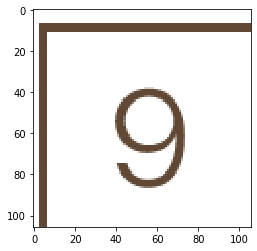

In [453]:
src1 = src[0:106, 0:106]
plt.imshow(src1)
plt.show()

In [89]:
h,w,d = src1.shape

In [93]:
src1.shape

(106, 106, 3)

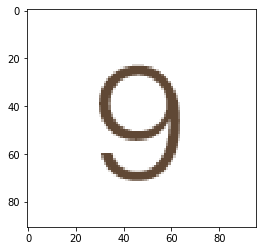

In [98]:
src2 = src1[15:106,10:106,:]
plt.imshow(src2)
plt.show()

In [91]:
# im = cv2.imread(filename)
h,w,d = src1.shape
#left limit
for i in range(w):
    if np.sum(src1[:,i,:]) > 0:
        break
#right limit
for j in range(w-1,0,-1):
    if np.sum(src1[:,j,:]) > 0:
        break

cropped = src1[:,i:j+1,:].copy()

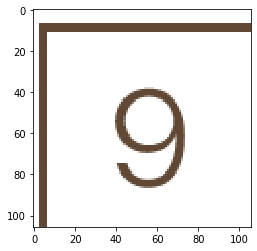

In [92]:
plt.imshow(cropped)
plt.show()

In [460]:
def h_z(image):
    steps = 1
    cutoff = 220
    h,w,d = image.shape
    for i in range(w):
        if(np.mean(image[i:i+1,:,:]) < cutoff):
            image[i:i+1,:,:].fill(255)
    for i in range(h):
        if(np.mean(image[:,i:i+1,:]) < cutoff):
            image[:,i:i+1,:].fill(255)
    return(image)

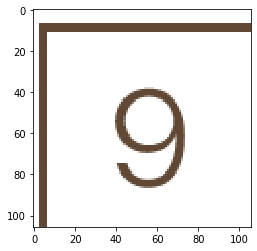

In [456]:
src1 = src[0:106, 0:106].copy()
plt.imshow(src[0:106, 0:106])
plt.show()

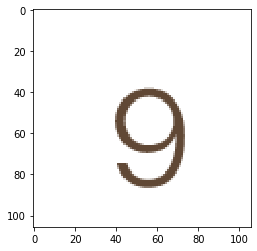

In [457]:
plt.imshow(h_z(src1))
plt.show()

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
src = cv2.imread("difficulty_hard_p1_copy.png")

In [4]:
def h_z(image):
    steps = 1
    cutoff = 220
    h,w,d = image.shape
    for i in range(w):
        if(np.mean(image[i:i+1,:,:]) < cutoff):
            image[i:i+1,:,:].fill(255)
    for i in range(h):
        if(np.mean(image[:,i:i+1,:]) < cutoff):
            image[:,i:i+1,:].fill(255)
    return(image)

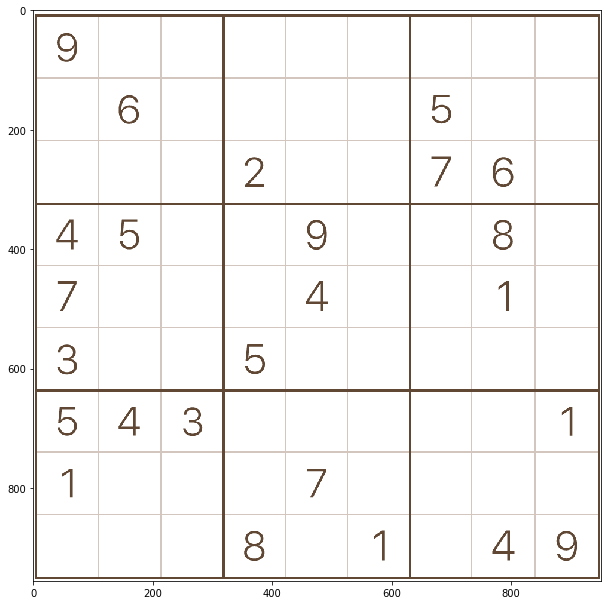

In [5]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(src)
plt.show()

In [6]:
src = h_z(src)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


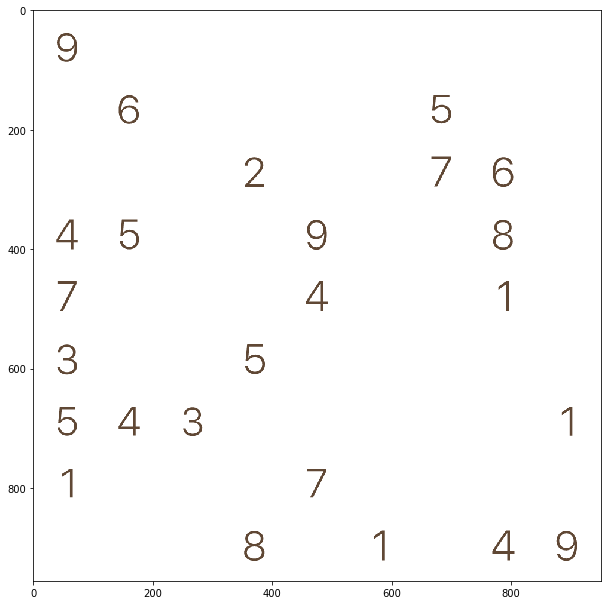

In [7]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.imshow(src)
plt.show()

In [15]:
h,w,d = src.shape

In [22]:
h,w,d

(956, 952, 3)

In [23]:
box = np.sum([956//9, 952//9])//2

In [32]:
round(np.sum([956//9, 952//9])/2)

106.0

In [24]:
box

105

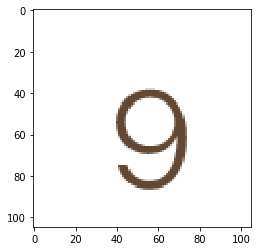

In [11]:
plt.imshow(src[0:105:, 0:105,:])
plt.show()

In [54]:
src1 = cv2.resize(src[315:315+105, 315:315+105,:], (28,28), interpolation = cv2.INTER_LINEAR)

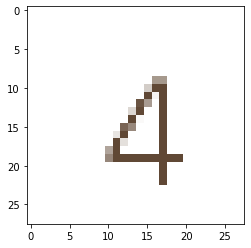

In [55]:
plt.imshow(src1)
plt.show()

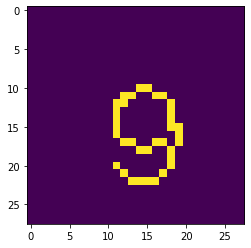

[[0.016 0.    0.001 0.    0.003 0.003 0.955 0.021 0.    0.   ]]
6


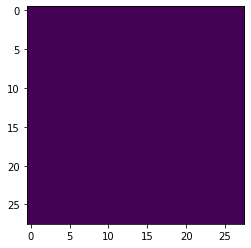

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


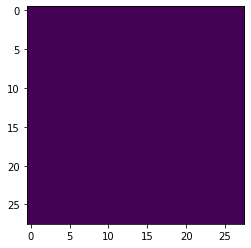

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


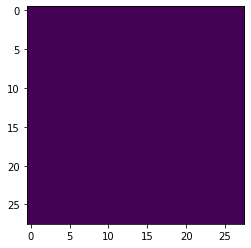

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


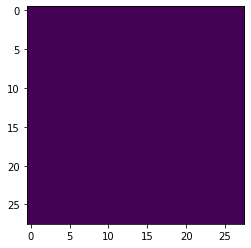

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


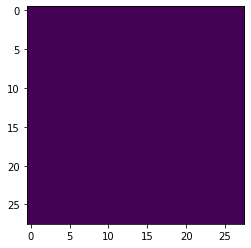

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


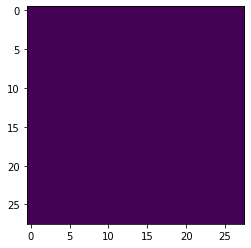

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


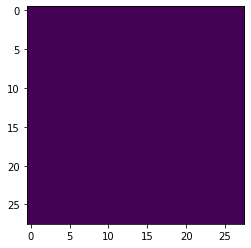

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


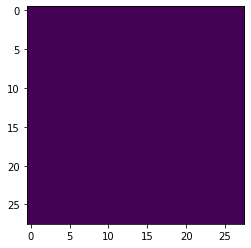

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


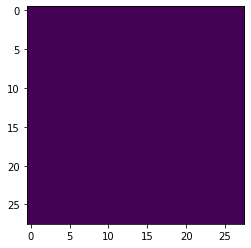

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


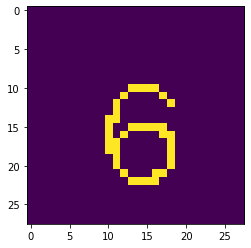

[[0.057 0.    0.022 0.    0.031 0.014 0.871 0.001 0.002 0.001]]
6


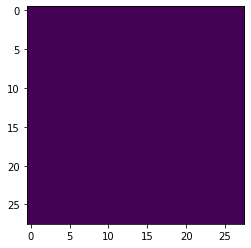

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


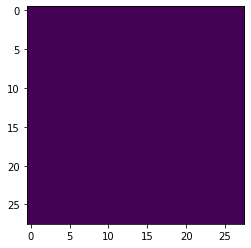

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


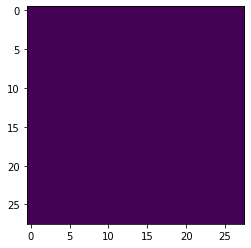

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


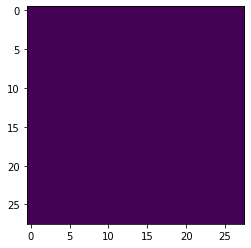

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


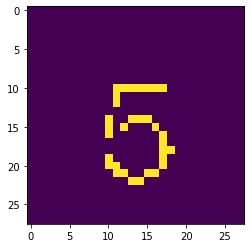

[[0.063 0.011 0.124 0.054 0.    0.518 0.072 0.007 0.149 0.001]]
5


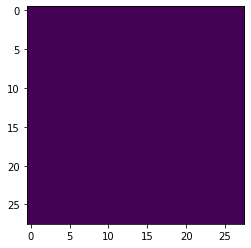

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


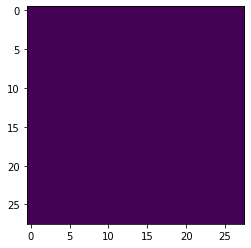

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


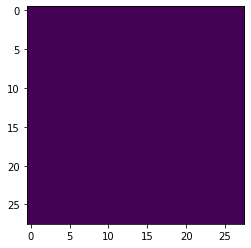

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


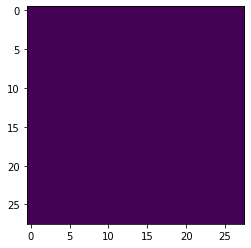

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


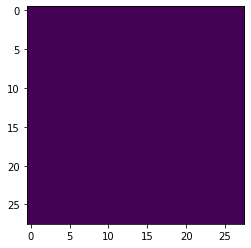

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


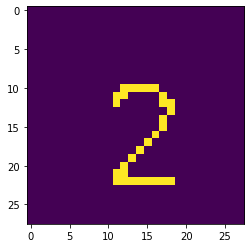

[[0.012 0.065 0.154 0.001 0.001 0.072 0.001 0.682 0.009 0.004]]
7


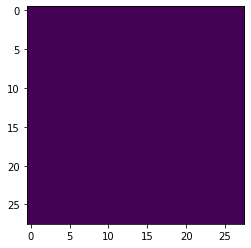

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


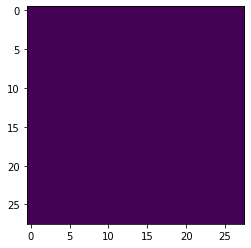

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


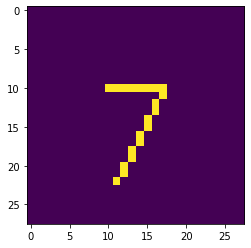

[[0.003 0.192 0.044 0.005 0.008 0.003 0.    0.71  0.02  0.013]]
7


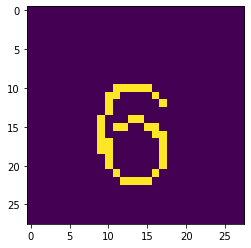

[[0.173 0.001 0.095 0.001 0.006 0.083 0.51  0.001 0.127 0.003]]
6


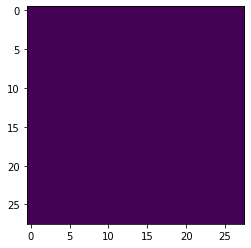

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


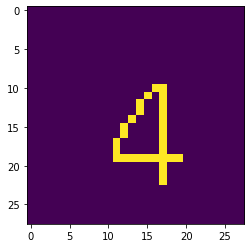

[[0.023 0.076 0.243 0.188 0.033 0.073 0.328 0.025 0.008 0.003]]
6


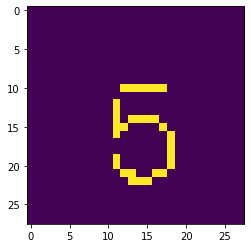

[[0.009 0.027 0.037 0.029 0.027 0.44  0.411 0.001 0.016 0.003]]
5


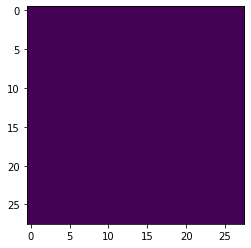

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


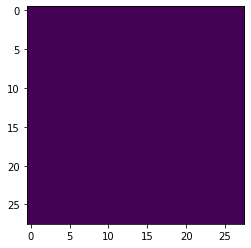

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


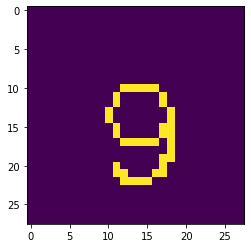

[[0.16  0.001 0.097 0.    0.016 0.02  0.516 0.188 0.001 0.001]]
6


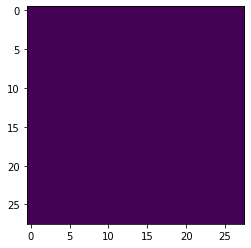

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


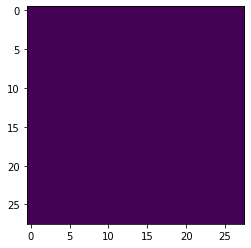

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


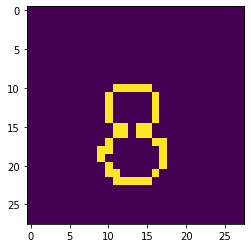

[[0.006 0.001 0.212 0.    0.006 0.059 0.543 0.001 0.17  0.001]]
6


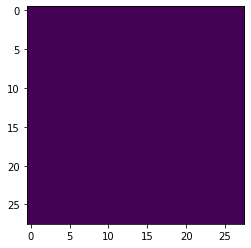

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


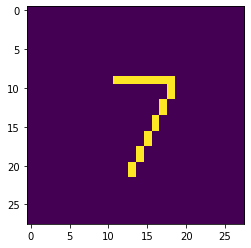

[[0.001 0.08  0.057 0.013 0.011 0.008 0.    0.792 0.001 0.038]]
7


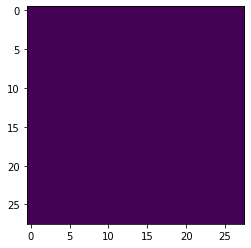

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


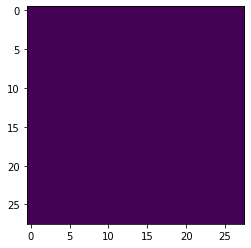

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


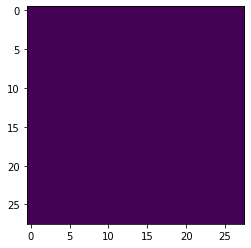

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


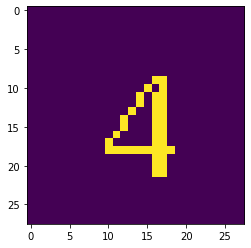

[[0.004 0.034 0.047 0.005 0.89  0.001 0.012 0.005 0.    0.002]]
4


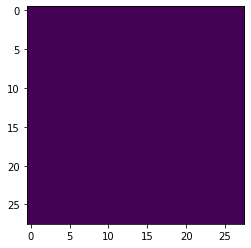

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


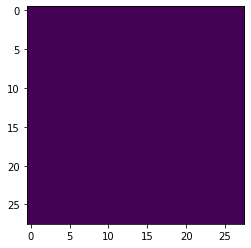

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


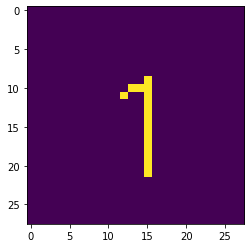

[[0.    0.241 0.03  0.003 0.045 0.023 0.    0.534 0.004 0.118]]
7


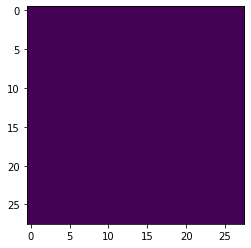

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


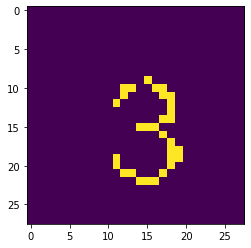

[[0.05  0.092 0.343 0.086 0.151 0.06  0.02  0.122 0.054 0.021]]
2


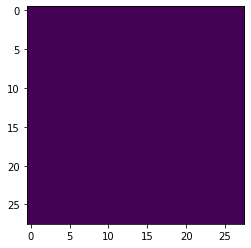

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


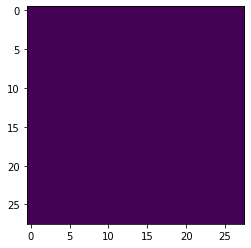

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


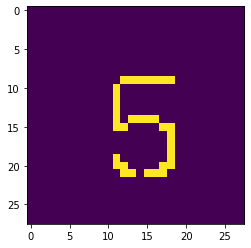

[[0.    0.005 0.01  0.004 0.005 0.959 0.005 0.001 0.003 0.008]]
5


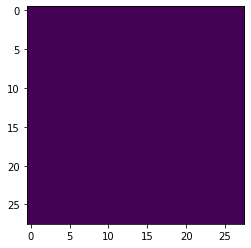

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


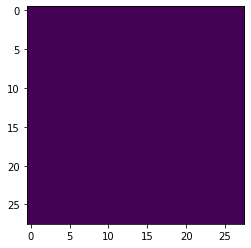

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


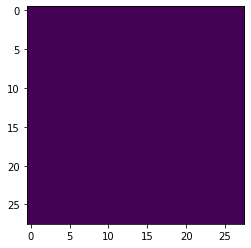

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


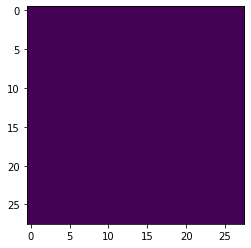

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


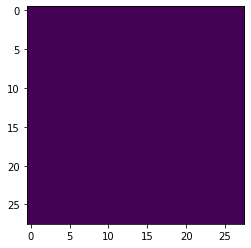

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


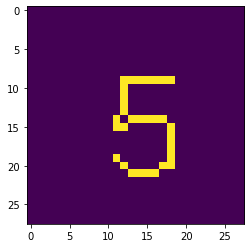

[[0.001 0.025 0.009 0.03  0.043 0.878 0.005 0.002 0.002 0.005]]
5


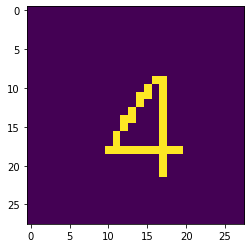

[[0.126 0.016 0.109 0.559 0.05  0.011 0.099 0.028 0.001 0.   ]]
3


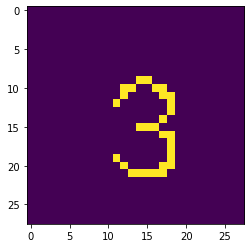

[[0.012 0.356 0.189 0.191 0.04  0.012 0.004 0.182 0.01  0.003]]
1


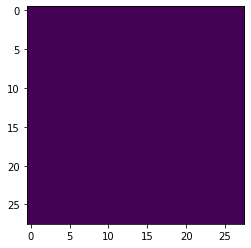

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


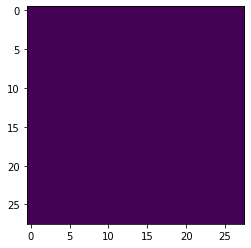

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


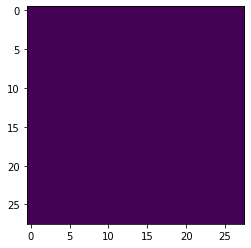

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


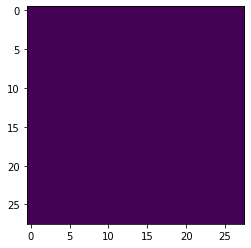

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


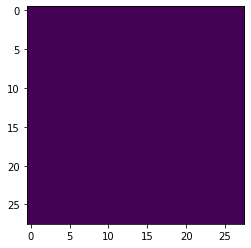

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


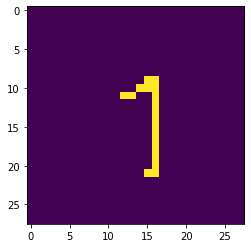

[[0.001 0.499 0.079 0.016 0.093 0.001 0.    0.039 0.003 0.269]]
1


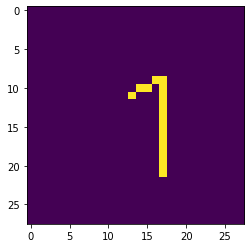

[[0.022 0.031 0.012 0.026 0.035 0.012 0.    0.69  0.016 0.155]]
7


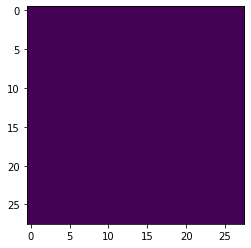

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


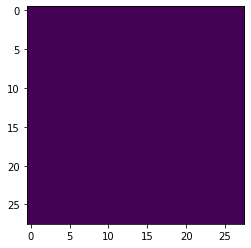

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


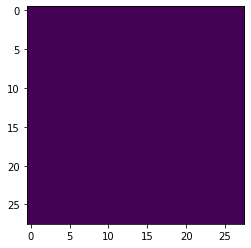

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


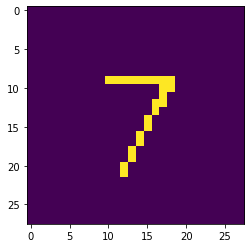

[[0.    0.013 0.003 0.002 0.001 0.    0.    0.977 0.    0.003]]
7


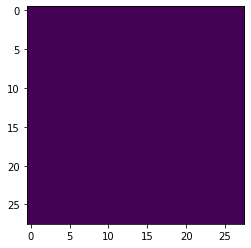

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


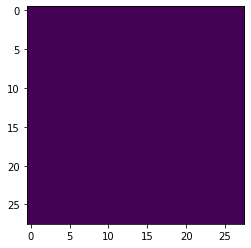

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


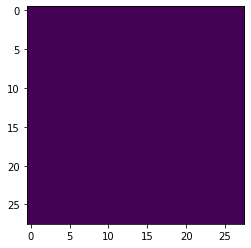

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


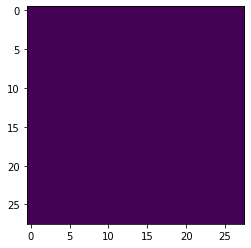

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


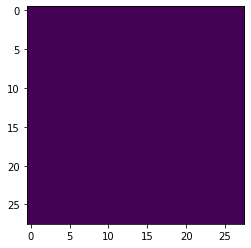

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


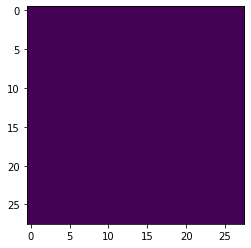

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


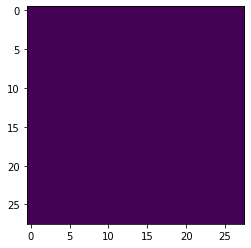

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


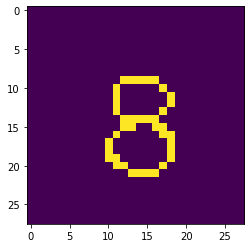

[[0.031 0.015 0.65  0.006 0.062 0.032 0.174 0.001 0.008 0.02 ]]
2


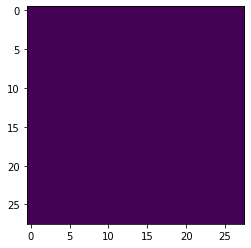

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


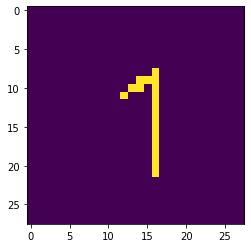

[[0.002 0.358 0.087 0.017 0.064 0.    0.    0.102 0.002 0.367]]
9


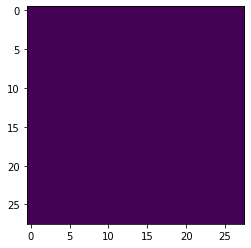

[[0.064 0.088 0.127 0.051 0.104 0.218 0.08  0.085 0.11  0.072]]
5


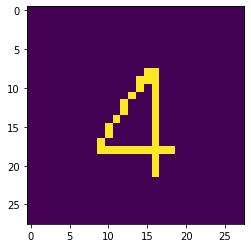

[[0.058 0.046 0.178 0.004 0.659 0.001 0.006 0.014 0.    0.033]]
4


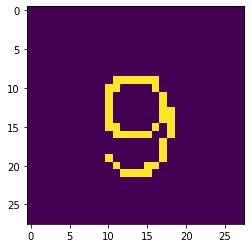

[[0.022 0.004 0.388 0.048 0.342 0.01  0.021 0.061 0.006 0.098]]
2


In [77]:
for i in range(0,h-box,box):
    for j in range(0,w-box,box):
#         plt.imshow(src[i:i+box:, j:j+box,:])
#         plt.show()
        src1 = cv2.resize(src[i:i+box:, j:j+box,:], (28,28), interpolation = cv2.INTER_CUBIC)        
        gray = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)[1]
        plt.imshow(thresh)
        plt.show()

        src_use = thresh.reshape(1, 784).astype('float32')
        src_use = src_use/255
        print(np.round(use_model.predict(src_use),3))
        print(np.argmax(use_model.predict(src_use)))

### prediction

In [1]:
import tensorflow as tf
from tensorflow import keras

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [47]:
X_train = X_train / 255
X_test = X_test / 255

In [48]:
X_train.shape

(60000, 784)

In [49]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [50]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
X_test.shape[0]

10000

In [6]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2790 - accuracy: 0.9201 - val_loss: 0.1459 - val_accuracy: 0.9570
Epoch 2/10
 - 5s - loss: 0.1105 - accuracy: 0.9678 - val_loss: 0.0905 - val_accuracy: 0.9716
Epoch 3/10
 - 5s - loss: 0.0703 - accuracy: 0.9800 - val_loss: 0.0829 - val_accuracy: 0.9754
Epoch 4/10
 - 5s - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0752 - val_accuracy: 0.9769
Epoch 5/10
 - 6s - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0642 - val_accuracy: 0.9802
Epoch 6/10
 - 6s - loss: 0.0262 - accuracy: 0.9931 - val_loss: 0.0624 - val_accuracy: 0.9800
Epoch 7/10
 - 6s - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0629 - val_accuracy: 0.9805
Epoch 8/10
 - 6s - loss: 0.0151 - accuracy: 0.9964 - val_loss: 0.0611 - val_accuracy: 0.9820
Epoch 9/10
 - 6s - loss: 0.0101 - accuracy: 0.9981 - val_loss: 0.0569 - val_accuracy: 0.9829
Epoch 10/10
 - 5s - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0561 - val_accuracy: 0.9825
Baseline Error: 1.

In [8]:
np.round(model.predict(X_test)[0],3)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [9]:
np.argmax(model.predict(X_test)[0])

7

In [10]:
model.save('tf_model')

In [15]:
use_model = tf.keras.models.load_model('tf_model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
